# **Assignment-2 AUTO ML**

What is AutoML?

Automactic Machine Learning or AutoML refers to the automation of various tasks in the machine learning pipeline, including data preprocessing, hyperparameter tuning, model selection, and evaluation.

# **ABSTRACT:**

In this notebook i have used the dataset that describes world population(yearly %change, median age, fertility rate, global rank) of all the continenst and countries from 1955-2020. Each time period records the change 5 years apart. The main aim of the notebook is to check the quality of data and determine which features are important. 

The dataset consist of 13 columns:



1.   Continent-Continent of the population
2.   Country-Country of the population
3.   Year- Year range of the population from 1955-2020.
4.   Population- Population of each countries in given year
5.   Yearly %Change- Yearly percentage change of the population.
6.   Yearly Change-Yearly change of the population.
7.   Migrants(net)-Net migrants yearwise.
8.   MedianAge-Median age pf the world population.
9.   Fertility Rate-Rate of the world population.
10.  UrbanPop%-Percenatge of the urban population.
11.  UrbanPopulation
12.  Country%OfWolrdPop-Percentage of the country of world population
13.  GlobalRank- Globalrank of each country continentwise.






In [9]:
#installing dependencies for the assignment
!pip install pycaret 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Understanding the Data**

In [10]:
#Importing dependencies for the assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
#Reading the dataset
url = r'https://github.com/jeelkan/DSE/blob/main/population.csv?raw=true'
wp_df = pd.read_csv(url,index_col=0)

In [12]:
#viewing first 5 rows of the dataset
wp_df.head()

,Continent,Country,Year,Population,Yearly%Change,YearlyChange,Migrants(net),MedianAge,FertilityRate,UrbanPop%,UrbanPopulation,Country%OfWorldPop,GlobalRank
0,Asia,Afghanistan,1955,8270991,1.30,103775,-4000,19.2,7.45,7.1,587818,0.30,48
1,Asia,Afghanistan,1960,8996973,1.70,145196,-4000,18.8,7.45,8.4,755797,0.30,48
2,Asia,Afghanistan,1965,9956320,2.05,191869,-4000,18.4,7.45,9.9,984350,0.30,48
3,Asia,Afghanistan,1970,11173642,2.33,243464,-4000,17.9,7.45,11.6,1295433,0.30,48
4,Asia,Afghanistan,1975,12689160,2.58,303104,-4000,17.3,7.45,13.5,1717422,0.31,48


In [13]:
#Checking the data type 
wp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4230 entries, 0 to 4229
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Continent           4230 non-null   object 
 1   Country             4230 non-null   object 
 2   Year                4230 non-null   int64  
 3   Population          4230 non-null   int64  
 4   Yearly%Change       4230 non-null   float64
 5   YearlyChange        4230 non-null   int64  
 6   Migrants(net)       4230 non-null   int64  
 7   MedianAge           4230 non-null   float64
 8   FertilityRate       4230 non-null   float64
 9   UrbanPop%           4230 non-null   float64
 10  UrbanPopulation     4230 non-null   int64  
 11  Country%OfWorldPop  4230 non-null   float64
 12  GlobalRank          4230 non-null   int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 462.7+ KB


In [14]:
#checking if any data is missing
wp_df.isnull().sum()

Continent             0
Country               0
Year                  0
Population            0
Yearly%Change         0
YearlyChange          0
Migrants(net)         0
MedianAge             0
FertilityRate         0
UrbanPop%             0
UrbanPopulation       0
Country%OfWorldPop    0
GlobalRank            0
dtype: int64

No data is missing from the dataset which means that it is not required to impute or remove null values from the dataset.

In [15]:
wp_df.describe()

,Year,Population,Yearly%Change,YearlyChange,Migrants(net),MedianAge,FertilityRate,UrbanPop%,UrbanPopulation,Country%OfWorldPop,GlobalRank
count,4230.000000,4.230000e+03,4230.000000,4.230000e+03,4.230000e+03,4230.000000,4230.000000,4230.000000,4.230000e+03,4230.000000,4230.000000
mean,1994.166667,2.423329e+07,1.659778,3.271283e+05,-4.121513e+00,21.789243,3.324785,52.558869,1.167059e+07,0.425392,117.183452
std,21.723653,1.063217e+08,1.650514,1.329164e+06,9.808264e+04,11.751355,2.289232,26.768449,4.665141e+07,1.800249,68.058075
min,1955.000000,6.440000e+02,-12.930000,-6.730240e+05,-1.077397e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
25%,1975.000000,2.733908e+05,0.610000,1.201750e+03,-8.997000e+03,17.200000,1.690000,31.200000,1.148200e+05,0.000000,58.000000
50%,1997.500000,3.603262e+06,1.530000,3.730850e+04,0.000000e+00,20.700000,2.790000,52.500000,1.479994e+06,0.070000,117.000000
75%,2016.000000,1.276953e+07,2.590000,2.038582e+05,2.225250e+03,30.000000,5.347500,74.300000,6.588019e+06,0.250000,176.000000
max,2020.000000,1.439324e+09,23.300000,2.067648e+07,1.771991e+06,48.400000,8.800000,100.000000,8.750759e+08,22.700000,235.000000


This table shows summary statistics for a dataset with 4230 observations and 11 variables.

The variables are: Year,Population,Yearly%Change,YearlyChange,Migrants(net),MedianAge,FertilityRate,UrbanPop%,UrbanPopulation,Country%OfWorldPop and GlobalRank.

The "count" row shows the number of observations for each variable, while the "mean" row shows the average value of each variable.

The "std" row shows the standard deviation of each variable, which is a measure of how much the values vary from the mean.

The "min" and "max" rows show the smallest and largest values observed for each variable.

The "25%", "50%", and "75%" rows show the values at the 25th, 50th, and 75th percentiles of the distribution, respectively.

These percentiles divide the observations into quarters, with the 25th percentile being the value below which 25% of the observations fall, and so on.

# **Visualization**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


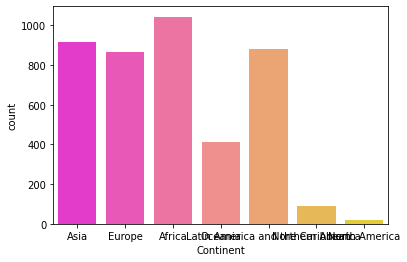

In [16]:

import seaborn as sns
sns.countplot(wp_df['Continent'],palette='spring');

We see that our data is mildly imbalanced. As the data is not that big we will not be upscale the minority class or downscale the majority class

More on ---

what is Unbalace in data?

what upscaling is ?

what downscaling is?

check this out - https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

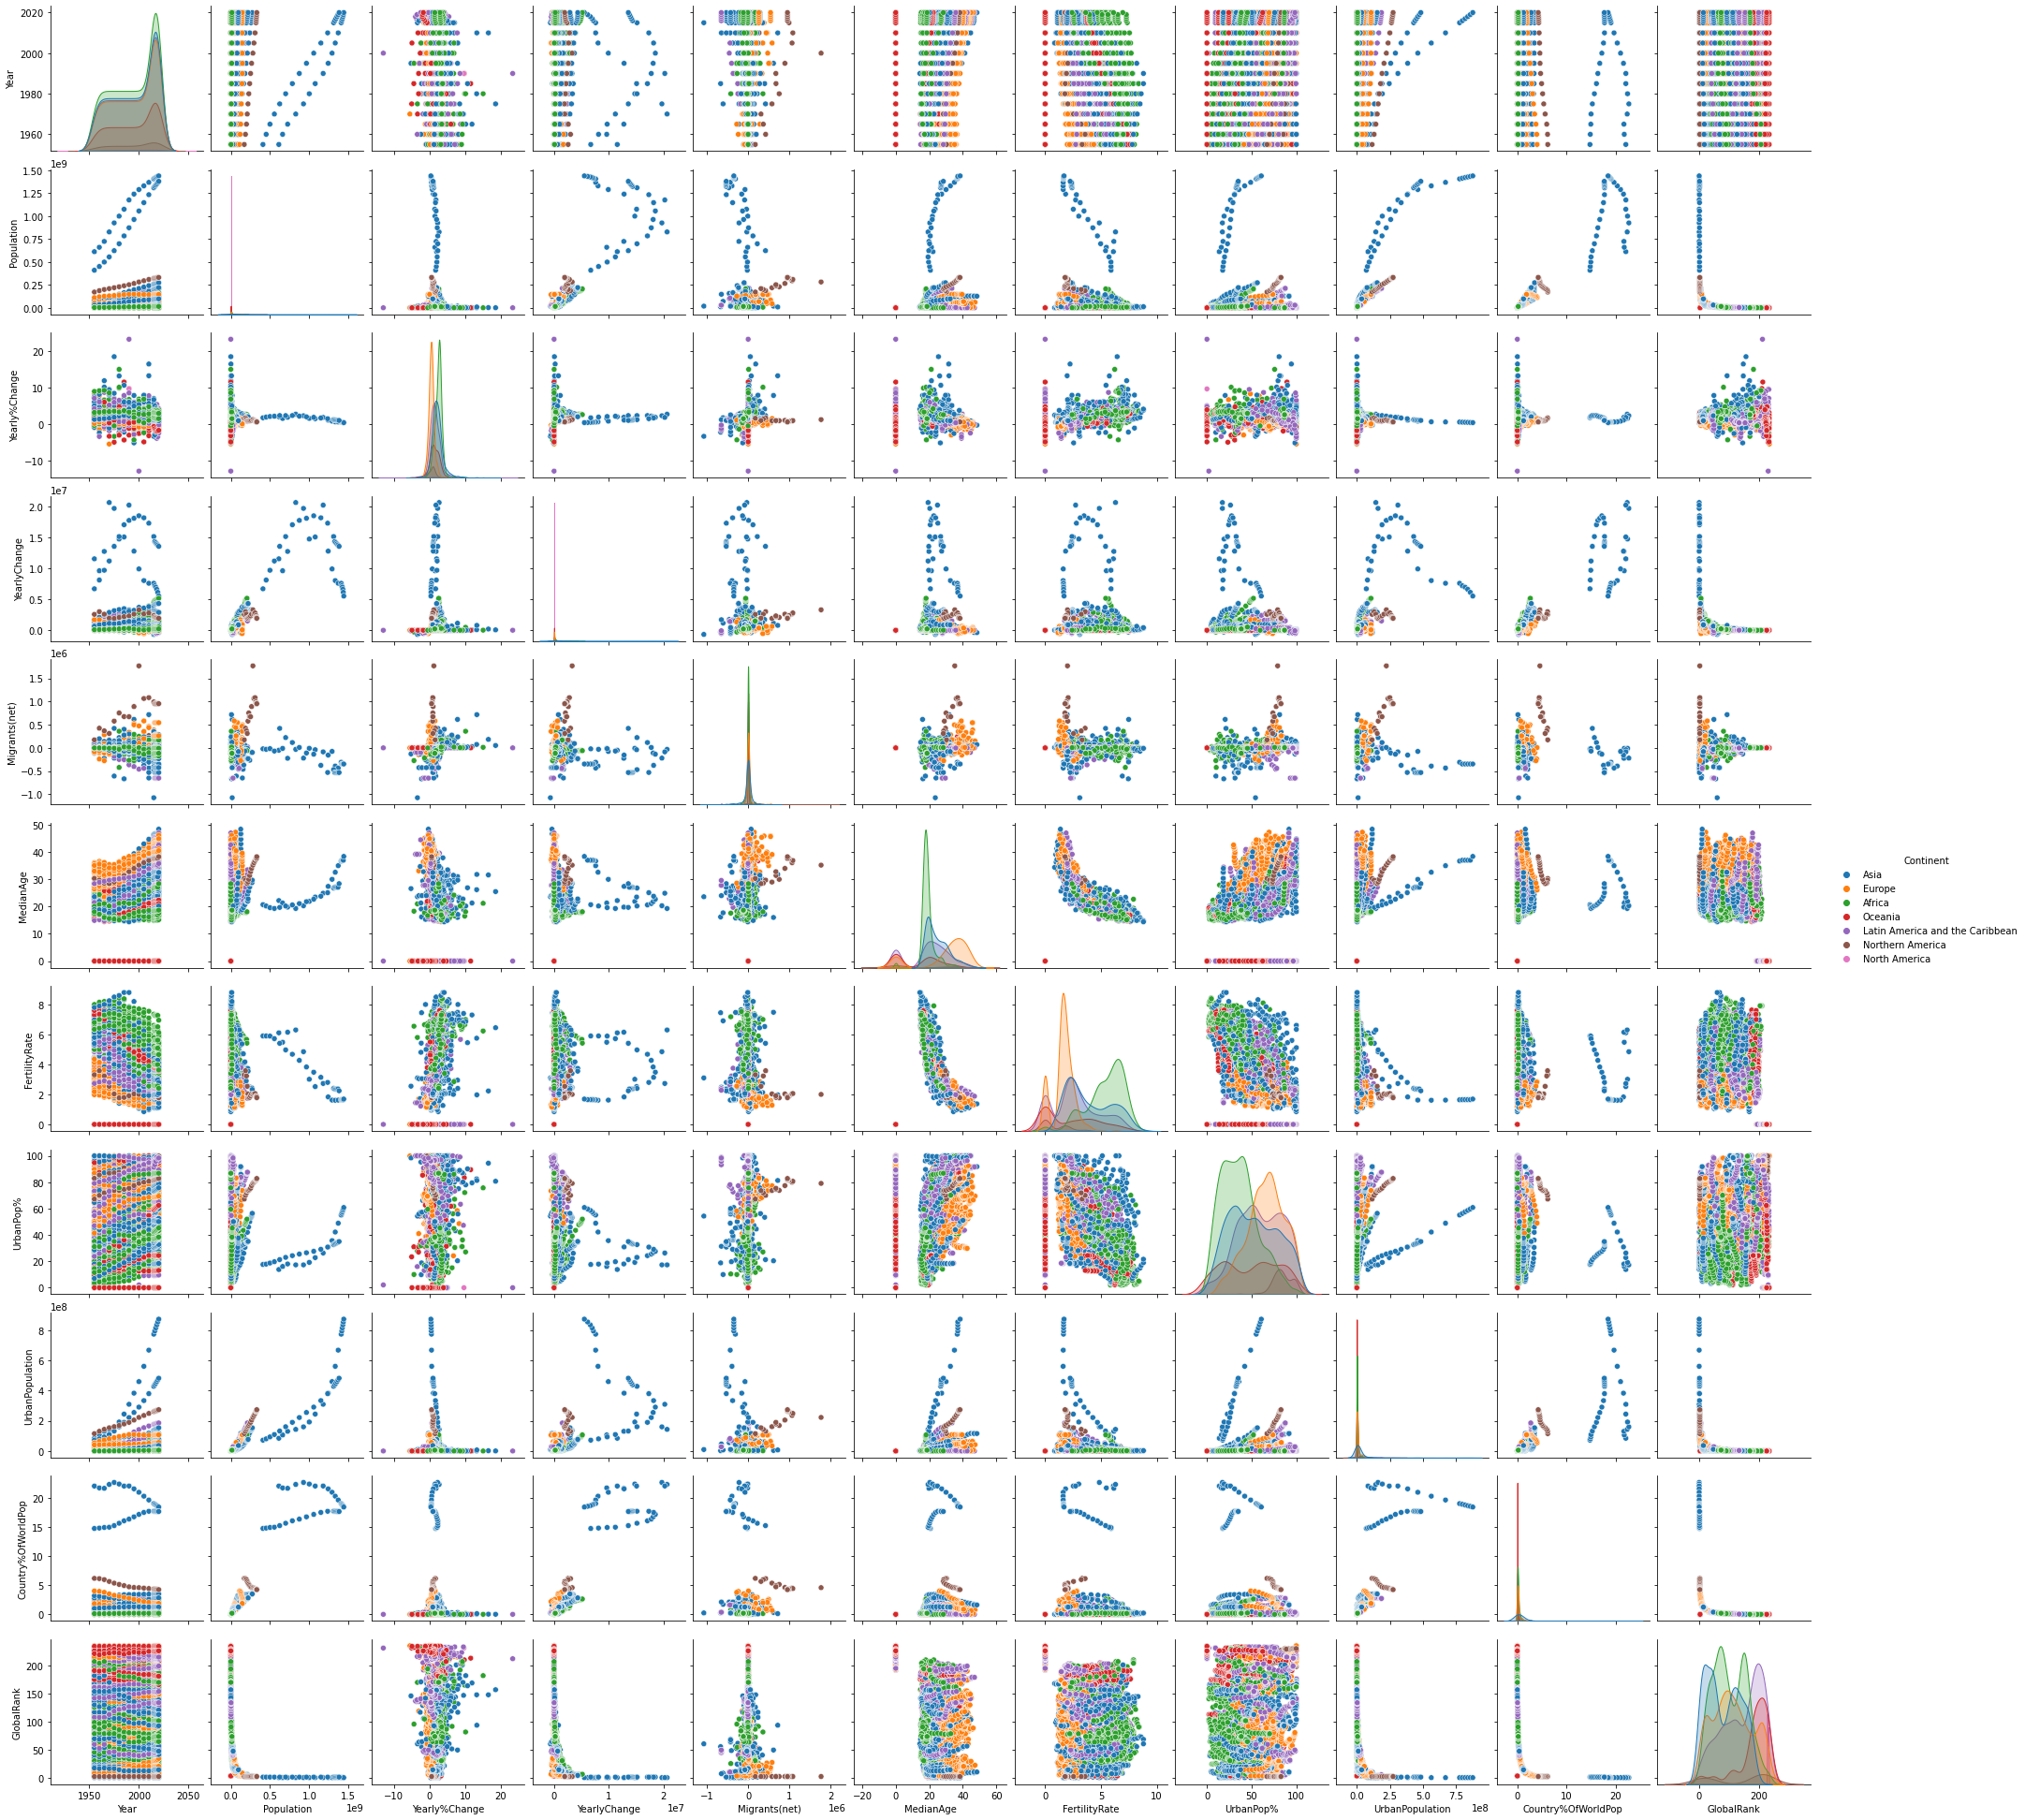

In [17]:
#pairplot to check collinearity
sns.pairplot(wp_df,hue='Continent');

**Interpreting PairPlot**



*   A pair plot is a graphical representation of pairwise relationships between variables in a dataset. It displays scatter plots for each pair of variables
*   Distribution of variables: The histograms show the distribution of each variable. If a variable has a normal distribution, the histogram will be bell-shaped. If a variable is skewed, the histogram will be asymmetric. The pair plot can help identify variables that have non-normal distributions or outliers.


*   Potential predictors: By examining the scatter plots, you can identify variables that may be potential predictors for a statistical model. Variables that have a strong correlation with the target variable may be good predictors for the model.



From the pairplot above we can see that all the variables are independent of wach other without correlation.

<AxesSubplot:>

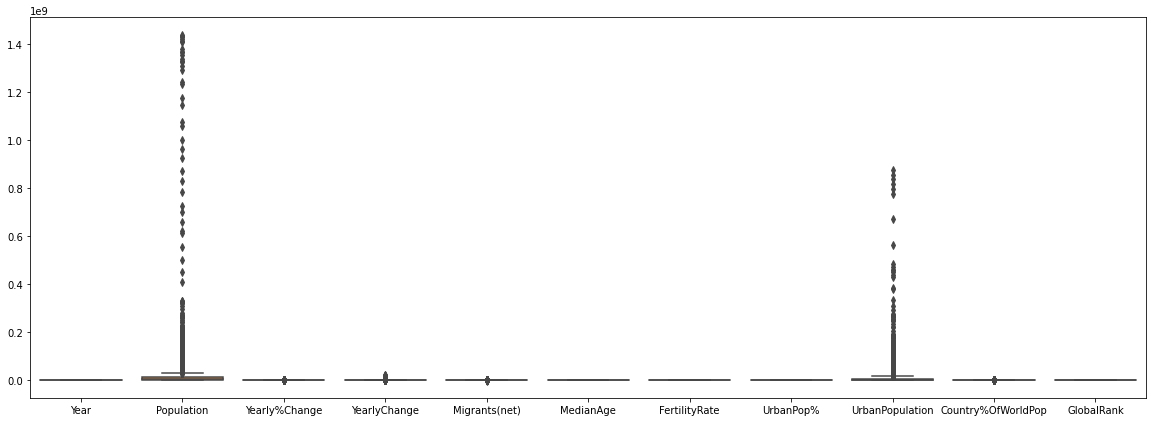

In [18]:
#Checking range of predictor variables and dependent variables
plt.figure(figsize=(20,7))
sns.boxplot(data=wp_df)


It is hard to visualize and read data as they are not in same ranges, I'll try to normalize the data for better understanding and visualization. I will also help later to get normalized coefficients when building the model. So need to normalize each column so that they are in same range.

In [19]:
#normalizing data
wp_df_numeric=wp_df[['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
wp_df_numeric = pd.DataFrame(scaler.fit_transform(wp_df_numeric),columns=wp_df_numeric.columns)
wp_df_numeric.head()

,Population,Yearly%Change,YearlyChange,Migrants(net),MedianAge,FertilityRate,UrbanPop%,UrbanPopulation,Country%OfWorldPop,GlobalRank
0,-0.150150,-0.218005,-0.168060,-0.040745,-0.220362,1.802222,-1.698427,-0.237594,-0.069661,-1.016656
1,-0.143321,0.024372,-0.136893,-0.040745,-0.254404,1.802222,-1.649856,-0.233993,-0.069661,-1.016656
2,-0.134297,0.236453,-0.101775,-0.040745,-0.288447,1.802222,-1.593813,-0.229093,-0.069661,-1.016656
3,-0.122846,0.406117,-0.062952,-0.040745,-0.331000,1.802222,-1.530298,-0.222424,-0.069661,-1.016656
4,-0.108590,0.557603,-0.018077,-0.040745,-0.382064,1.802222,-1.459311,-0.213377,-0.064106,-1.016656


After Normalizing the data boxplot is shown below.

<AxesSubplot:>

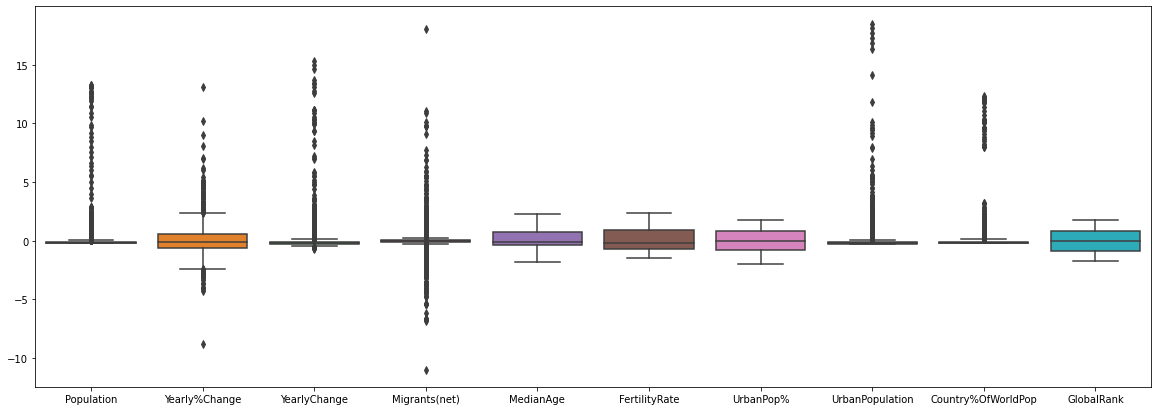

In [20]:
plt.figure(figsize=(20,7))
sns.boxplot(data=wp_df_numeric)

# **Checking Catagorical Data**


In [21]:
wp_df.Continent.value_counts()


Africa                             1044
Asia                                918
Latin America and the Caribbean     882
Europe                              864
Oceania                             414
Northern America                     90
North America                        18
Name: Continent, dtype: int64

In [22]:
wp_df.Country.value_counts()

Afghanistan         18
Papua New Guinea    18
Nicaragua           18
Niger               18
Nigeria             18
                    ..
Greenland           18
Grenada             18
Guadeloupe          18
Guam                18
Zimbabwe            18
Name: Country, Length: 235, dtype: int64

there is a no irregularity in data.

# **Correlation Analysis**

In [23]:
#Correlation
corr=wp_df.corr()

<AxesSubplot:>

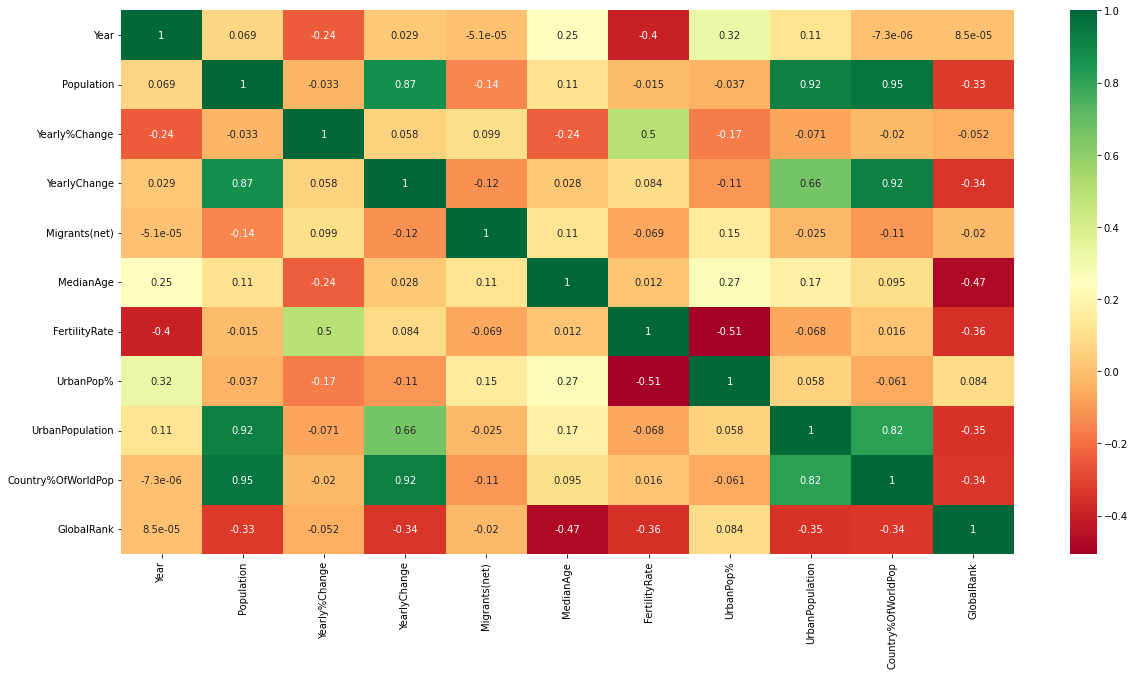

In [24]:
#heat map of correlation
plt.figure(figsize=(20,10))
sns.heatmap(wp_df.corr(), annot=True, cmap='RdYlGn')



Above is a graphical representation of the correlation between different features in the dataset. The heatmap displays a matrix of colors that represent the strength of the correlation between pairs of variables.

We can calculate the correlation between pairs of variables using a correlation coefficient, such as the Pearson correlation coefficient. This coefficient measures the linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no correlation

The above heatmap displays the correlation coefficients as colors in a matrix, with each variable plotted both on the x and y axis. The color of each cell in the matrix indicates the strength of the correlation between the corresponding pair of variables, with a color scale ranging from low to high .

From the Above Matrix we can conclude a few things


*   Population and Country%OfWorldPop are highly correlated
*   UrbanPopulation dna Population is highly correlated.


*   YearlyChange and Population is highly correlated.






# **Data test Split**

In [25]:

from sklearn.model_selection import train_test_split

wp_df, wp_df_unseen = train_test_split(wp_df, test_size=0.1, random_state=0)

print(wp_df.shape)
print(wp_df_unseen.shape)

(3807, 13)
(423, 13)


In [26]:
pip install numba --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 9.2 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires numba<0.55, but you have numba 0.56.4 which is incompatible.


# **Linear Regression**

In [27]:
wp_df.head()

,Continent,Country,Year,Population,Yearly%Change,YearlyChange,Migrants(net),MedianAge,FertilityRate,UrbanPop%,UrbanPopulation,Country%OfWorldPop,GlobalRank
3400,Latin America and the Caribbean,Sint Maarten,2019,42388,1.07,448,0,0.0,0.00,96.6,40939,0.00,213
408,Northern America,Bermuda,2015,63692,-0.52,-339,0,0.0,0.00,97.3,62003,0.00,205
3502,Asia,South Korea,2005,48701073,0.55,264366,16245,34.8,1.21,81.4,39622010,0.74,25
1077,Latin America and the Caribbean,Dominican Republic,2018,10627141,1.08,114037,-30000,26.8,2.43,83.0,8823303,0.14,86
1303,Europe,France,1990,56666849,0.51,282400,55277,34.8,1.80,74.4,42182927,1.06,17


In [28]:
#importing the regression dependencies
from pycaret.regression import *

**Setting up the environment in PyCaret**

The transformation pipeline is created to prepare the data for modeling and deployment, after the setup() function is initiated. setup() must be called before any other function is executed in PyCaret. There are 2 mandatory parameters for setup(): a pandas DataFrame and the name of the label column.In this code, we load the World Population dataset and initialize the setup using the setup() function.

Here dataframe is wp_df and name pf the target variable is MedianAge.




In [29]:
#Initilaizing the setup
model_description = setup(data = wp_df, target = 'MedianAge',remove_multicollinearity = True, multicollinearity_threshold = 0.8)

,Description,Value
0,session_id,2204
1,Target,MedianAge
2,Original Data,"(3807, 13)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2664, 230)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='MedianAge',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='MedianAge')),
                ('fix_perfect', Remove_100(target='MedianAge')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'p

In [30]:
#Compare models
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.7042,1.467200e+00,1.2079,9.895000e-01,0.0636,0.0336,2.586
lightgbm,Light Gradient Boosting Machine,0.8953,1.904800e+00,1.3760,9.863000e-01,0.0687,0.0412,0.193
rf,Random Forest Regressor,0.8696,2.086800e+00,1.4377,9.850000e-01,0.0520,0.0404,2.490
gbr,Gradient Boosting Regressor,1.3488,3.681900e+00,1.9163,9.736000e-01,0.1353,0.0587,0.926
dt,Decision Tree Regressor,1.1517,4.194400e+00,2.0448,9.699000e-01,0.0736,0.0539,0.056
br,Bayesian Ridge,1.8023,5.710600e+00,2.3872,9.591000e-01,0.3964,0.0774,0.321
ada,AdaBoost Regressor,1.8949,6.358200e+00,2.5180,9.543000e-01,0.0957,0.0926,0.784
ridge,Ridge Regression,3.1822,1.648750e+01,4.0578,8.819000e-01,0.6435,0.1241,0.076
omp,Orthogonal Matching Pursuit,6.3145,6.626500e+01,8.1335,5.245000e-01,0.9319,0.2255,0.078
knn,K Neighbors Regressor,6.4807,7.142260e+01,8.4461,4.868000e-01,0.6873,0.2967,0.103


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=2204, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=2204, verbose=0, warm_start=False)

we can see all the models with their ranking based on accuracy.

# Creating Model

In PyCaret, the create_model() function takes a string parameter that specifies the algorithm to use for the model. 

**Creating Light Gradient Boosting Machine Model**

In this case, we are using the 'lightgbm' string to create a LightGBM model. Once created, the returned model object can be further tuned using the tune_model() function, or used to make predictions on new data using the predict_model() function.

In [31]:
lightgbm=create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9126,1.9647,1.4017,0.9854,0.0633,0.0417
1,0.9700,2.0879,1.4450,0.9864,0.0727,0.0456
2,0.8417,1.7602,1.3267,0.9879,0.0621,0.0388
3,0.8998,1.9471,1.3954,0.9858,0.0812,0.0399
4,0.9336,2.3503,1.5331,0.9806,0.0653,0.0422
5,0.9190,2.0465,1.4305,0.9859,0.0782,0.0411
6,0.9129,2.0108,1.4180,0.9851,0.0671,0.0413
7,0.8983,1.9416,1.3934,0.9874,0.0702,0.0434
8,0.7799,1.2301,1.1091,0.9904,0.0616,0.0376


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 3
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=2204, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


create_model('lightgbm') is a PyCaret function that creates a LightGBM regressor model with default hyperparameters. LightGBM is a gradient boosting framework that uses tree-based learning algorithms and is designed to be efficient, scalable and accurate.

We see that our linear regression has MSE value of 1.573 and coefficient of correlation squared (R2) is 98.9%. which is acceptable. R-Squared above 0.7 would generally be seen as showing a high level of correlation.

additionally we have a RMSE value of 1.25

more on--

MSE- https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/

r2 - https://www.investopedia.com/terms/r/r-squared.asp

In [32]:
tuned_lightgbm = tune_model(lightgbm,choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9380,2.0242,1.4227,0.9849,0.1138,0.0416
1,0.9642,2.0420,1.4290,0.9867,0.1451,0.0427
2,0.8893,1.6416,1.2813,0.9888,0.1740,0.0382
3,0.9946,2.0870,1.4446,0.9848,0.1630,0.0420
4,0.9313,2.1191,1.4557,0.9825,0.1075,0.0410
5,1.0053,2.5110,1.5846,0.9828,0.1517,0.0426
6,0.9411,1.7862,1.3365,0.9867,0.1647,0.0401
7,0.9579,2.0349,1.4265,0.9868,0.1621,0.0438
8,0.9185,1.6629,1.2895,0.9871,0.1364,0.0408


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=2204, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


On auto tuning the model with default value these seems to be no change. tried tuning the model with optamize(optimize='MSE') based on MSE, RMSE, MAE and R2 there seems to be no change in the mean values.

In [33]:
evaluate_model(tuned_lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=2204, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

After evaluating the model it shows different plots such as Hyperparameters, Validation curve, Feature importance, Learnign curve,etc.

In [34]:
predict_model(tuned_lightgbm);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=2204, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.9297,2.0414,1.4288,0.9844,0.0698,0.0438


We see that our linear regression has MSE value of 2.15 and coefficient of correlation squared (R2) is 98.46%. the closer the value of MSE to 0 the better. R-Squared greater than 0.7 would generally be seen as showing a high level of correlation.

additionally we have a RMSE value of 1.4, where in it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately

the model performs very well post tuning on test data.

# Plotting the Model
Before finalizing the model, the plot_model() function can be used to evaluate the performance of the model across different aspects such as Residual Plots, Prediction Error, Feature Importance, etc.



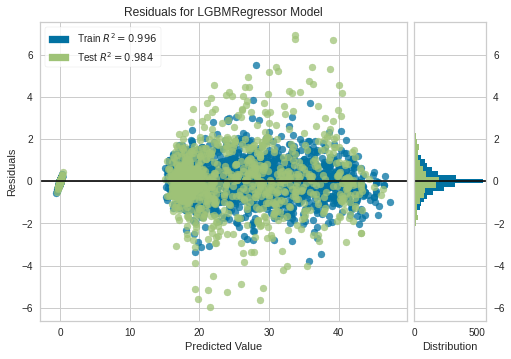

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [35]:
plot_model(tuned_lightgbm)

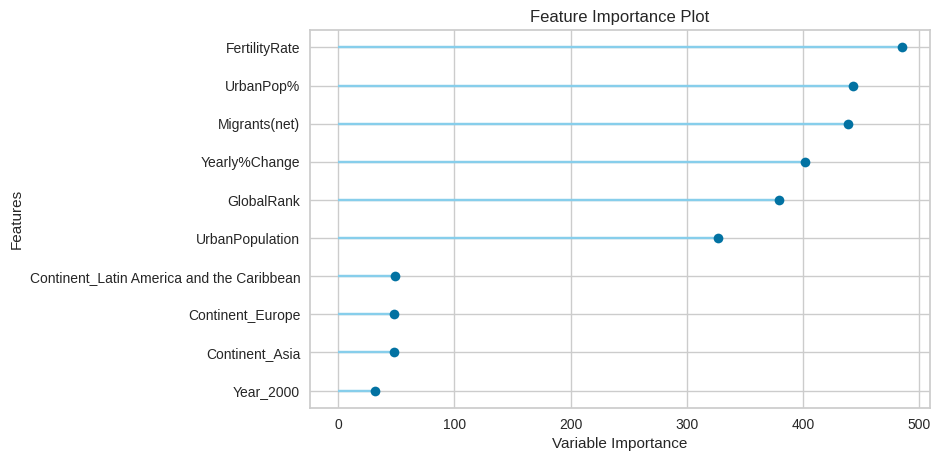

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [36]:
# Plot variable importance
plot_model(tuned_lightgbm, plot='feature')

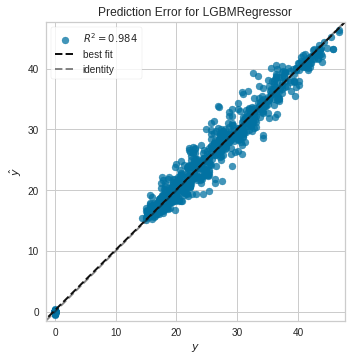

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [37]:
plot_model(tuned_lightgbm, plot = 'error')

# Finalizing the Model

In [38]:
final_lightgbm = finalize_model(tuned_lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=2204, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=22

In [39]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=2204, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [40]:
predict_model(final_lightgbm)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=2204, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.5415,0.6217,0.7885,0.9952,0.0433,0.0264


,Yearly%Change,Migrants(net),FertilityRate,UrbanPop%,UrbanPopulation,GlobalRank,Continent_Africa,Continent_Asia,Continent_Europe,Continent_Latin America and the Caribbean,...,Year_2005,Year_2010,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,MedianAge,Label
0,0.60,11755.0,1.86,76.000000,3420409.0,115.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.900002,36.385054
1,-0.61,0.0,0.00,0.000000,0.0,234.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.023502
2,2.98,0.0,6.30,44.799999,687909.0,137.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.299999,17.806089
3,1.68,41710.0,2.24,20.799999,5847671.0,50.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,22.700001,23.459303
4,1.05,-8353.0,3.03,30.000000,347895.0,159.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.700001,22.018725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,2.19,-16369.0,4.65,40.700001,13110502.0,24.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.000000,19.558801
1139,0.96,4200.0,1.83,79.300003,4003302.0,120.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,31.700001,31.888170
1140,-0.92,-7624.0,2.19,100.000000,402904.0,174.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.599998,36.807149
1141,0.52,0.0,0.00,50.299999,36284.0,201.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.003844


After finalizing the Light gradient boosting machine model we see that our linear regression has MSE value of 0.69 and coefficient of correlation squared (R2) is 99%. the closer the value of MSE to 0 the better. R-Squared greater than 0.7 would generally be seen as showing a high level of correlation.

additionally we have a RMSE value of 0.69, where in it can be said that RMSE values between 0.2 and 0.7 shows that the model can relatively predict the data accurately

the model performs very well post tuning on data.

# Predicting on the Test set

What the below code does is adds the predicted value to a new column called “Label” at the end of the DataFrame.

In [41]:
unseen_predictions = predict_model(final_lightgbm, data=wp_df_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=2204, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.7056,1.1901,1.0909,0.9916,0.0525,0.0331


,Continent,Country,Year,Population,Yearly%Change,YearlyChange,Migrants(net),MedianAge,FertilityRate,UrbanPop%,UrbanPopulation,Country%OfWorldPop,GlobalRank,Label
2655,Oceania,New Caledonia,2000,217269,2.37,4795,1415,27.2,2.59,60.7,131807,0.00,183,25.728756
1091,Latin America and the Caribbean,Ecuador,2010,15011117,1.66,237054,-9000,25.0,2.69,62.4,9362550,0.22,66,24.453238
2318,Oceania,Marshall Islands,2017,58058,0.56,323,0,0.0,0.00,70.1,40714,0.00,207,0.115957
1955,Africa,Kenya,2010,42030676,2.79,1081156,-37866,18.1,4.65,23.2,9746669,0.60,31,18.335292
3963,Africa,Uganda,1970,9405600,3.33,283907,10001,16.5,7.12,6.7,629441,0.25,56,16.448930


From the above table it can be seen that the model has predicted data accurately and MedianAge of the population is predicted properly.

# **Regularization**

In this Section, we will check if regularization is helping us to improve the accuracy and reduce overfitting.



*   Ridge and Lasso are regularization techniques used in linear regression to prev
*   Ridge regularization adds a penalty term to the least-squares objective function of the linear regression model. This penalty term is proportional to the square of the magnitude of the coefficients of the model, which shrinks the coefficients towards zero. The strength of the penalty is controlled by a hyperparameter called the regularization parameter, which needs to be tuned to achieve the best performance. Ridge regularization is particularly useful when there are many input variables that are correlated with each other, as it can help to reduce the variance of the model by reducing the effect of these correlated variables.
*   Lasso regularization is similar to Ridge regularization, but instead of adding a penalty term proportional to the square of the coefficients, it adds a penalty term proportional to the absolute value of the coefficients. This penalty term can set some coefficients to exactly zero, which makes Lasso regularization a useful method for feature selection. By 
*   The main difference between Ridge and Lasso regularization is the type of penalty function used. Ridge uses L2 regularization, while Lasso uses L1 regularization. L2 regularization tends to distribute the penalty evenly across all coefficients, while L1 regularization tends to concentrate the penalty on a smaller subset of the most important coefficients. Which method to use depends on the specific problem and the properties of the input variables.








In [42]:
# Create a LightGBM with Ridge regularization
lgbm_ridge = create_model('lightgbm', fold=5, n_estimators=100, learning_rate=0.1, boost_from_average=False,
                          reg_lambda=0.1, objective='regression', eval_metric='R2', verbose=False)

# Create a LightGBM with Lasso regularization
lgbm_lasso = create_model('lightgbm', fold=5, n_estimators=100, learning_rate=0.1, boost_from_average=False,
                          reg_alpha=0.1, objective='regression', eval_metric='R2', verbose=False)


INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lightgbm, fold=5, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=False, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={'n_estimators': 100, 'learning_rate': 0.1, 'boost_from_average': False, 'reg_lambda': 0.1, 'objective': 'regression', 'eval_metric': 'R2'})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Light Gradient Boosting Machine Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with KFold(n_splits=5, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading result

This code is creating two generalized linear regression models using the PyCaret machine learning platform with different regularization methods: Ridge and Lasso.

We have created a LightGBM model with Ridge regularization by setting the reg_lambda parameter to 0.1 and creating a LightGBM model with Lasso regularization by setting the reg_alpha parameter to 0.1 in the create_model() function. We also set the objective parameter to 'regression' and the eval_metric parameter to 'R2' to specify that we are performing regression and evaluating the model's performance using the R-squared metric.

**Creating Gradient Bossting Regressor Model**

In this case, we are using the 'lightgbm' string to create a LightGBM model. Once created, the returned model object can be further tuned using the tune_model() function, or used to make predictions on new data using the predict_model() function.

In [43]:
#create models
gbr=create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4286,4.1525,2.0378,0.9691,0.1152,0.0618
1,1.3516,3.8225,1.9551,0.9750,0.1542,0.0581
2,1.2195,2.9027,1.7037,0.9801,0.1547,0.0540
3,1.3529,4.1474,2.0365,0.9698,0.1217,0.0566
4,1.3123,3.5761,1.8911,0.9705,0.1244,0.0565
5,1.3488,3.9181,1.9794,0.9731,0.1281,0.0567
6,1.3894,3.9556,1.9889,0.9706,0.1322,0.0589
7,1.3433,3.5513,1.8845,0.9770,0.1569,0.0617
8,1.4106,3.4236,1.8503,0.9733,0.1313,0.0630


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 10
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2204, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


We see that our linear regression has MSE value of 3.4 and coefficient of correlation squared (R2) is 97.7%. which is acceptable. R-Squared above 0.7 would generally be seen as showing a high level of correlation.

additionally we have a RMSE value of 1.84

In [44]:
tuned_gbr = tune_model(gbr,choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.2466,3.1465,1.7738,0.9766,0.2681,0.0518
1,1.2074,2.8888,1.6997,0.9811,0.2703,0.0519
2,1.1744,2.4886,1.5775,0.9830,0.3155,0.0483
3,1.2256,2.9037,1.7040,0.9788,0.2358,0.0498
4,1.1941,2.3385,1.5292,0.9807,0.2447,0.0504
5,1.1578,2.2988,1.5162,0.9842,0.2550,0.0470
6,1.3538,3.5098,1.8735,0.9739,0.3574,0.0539
7,1.1435,2.4741,1.5729,0.9840,0.3160,0.0475
8,1.2459,2.9804,1.7264,0.9768,0.2779,0.0535


INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 11
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=6,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=210,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2204, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


On auto tuning the model with default value these seems to be slight change in the values.We see that our linear regression has MSE value of 1.5 and coefficient of correlation squared (R2) is 99%.Additionally RMSE value of 1.22.

In [45]:
evaluate_model(tuned_gbr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=6,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=210,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2204, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [46]:
predict_model(tuned_gbr);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=6,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=210,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2204, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing dis

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1.1333,2.4978,1.5804,0.9809,0.2601,0.0486


We see that our linear regression has MSE value of 1.73 and coefficient of correlation squared (R2) is 98.7%. the closer the value of MSE to 0 the better. R-Squared greater than 0.7 would generally be seen as showing a high level of correlation.

additionally we have a RMSE value of 1.31, where in it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately

the model performs very well post tuning on test data.

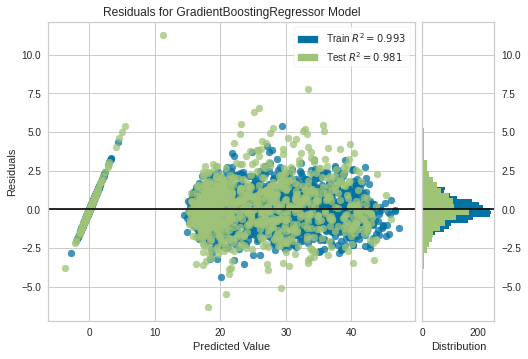

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [47]:
plot_model(tuned_gbr)

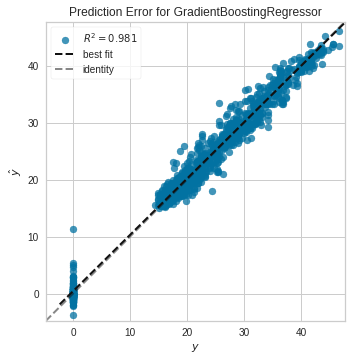

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [48]:
plot_model(tuned_gbr, plot = 'error')

# Finalizing the Model

In [49]:
final_gbr = finalize_model(tuned_gbr)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=6,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=210,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2204, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learn

In [50]:
print(final_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=6,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=210,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2204, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [51]:
predict_model(final_gbr);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=6,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=210,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2204, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing dis

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.8133,1.156,1.0752,0.9911,0.2346,0.0349


After finalizing the Gradient boosting regressor model has MSE value of 0.10 and coefficient of correlation squared (R2) is 99.9%. the closer the value of MSE to 0 the better. R-Squared greater than 0.7 would generally be seen as showing a high level of correlation.

additionally we have a RMSE value of 0.32, where in it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately

the model performs very well post tuning on test data.

# Predicting on the Test set

What the below code does is adds the predicted value to a new column called “Label” at the end of the DataFrame.

In [52]:
unseen_predictions = predict_model(final_gbr, data=wp_df_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=6,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=210,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2204, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing dis

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1.0835,2.0593,1.435,0.9854,0.2688,0.0458


,Continent,Country,Year,Population,Yearly%Change,YearlyChange,Migrants(net),MedianAge,FertilityRate,UrbanPop%,UrbanPopulation,Country%OfWorldPop,GlobalRank,Label
2655,Oceania,New Caledonia,2000,217269,2.37,4795,1415,27.2,2.59,60.7,131807,0.00,183,25.841894
1091,Latin America and the Caribbean,Ecuador,2010,15011117,1.66,237054,-9000,25.0,2.69,62.4,9362550,0.22,66,23.713879
2318,Oceania,Marshall Islands,2017,58058,0.56,323,0,0.0,0.00,70.1,40714,0.00,207,0.028913
1955,Africa,Kenya,2010,42030676,2.79,1081156,-37866,18.1,4.65,23.2,9746669,0.60,31,16.899467
3963,Africa,Uganda,1970,9405600,3.33,283907,10001,16.5,7.12,6.7,629441,0.25,56,16.901217


# **Regularization**


In [53]:
# Tune the model hyperparameters with Ridge regularization
tuned_gbm_ridge = tune_model(gbr, fold=5, optimize='R2',verbose=False)

# Tune the model hyperparameters with Lasso regularization
tuned_gbm_lasso = tune_model(gbr, fold=5, optimize='R2',verbose=False)



INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2204, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), fold=5, round=4, n_iter=10, custom_grid=None, optimize=R2, custom_scorer=None, search_library=scikit-learn, search_algorithm=None, early_stopping=False, early_stopping_max_iters=10, choose_better=False, fit_kwargs=None, groups=None, return_tuner=False, verbose=False

# **Linear Regression Assumptions**

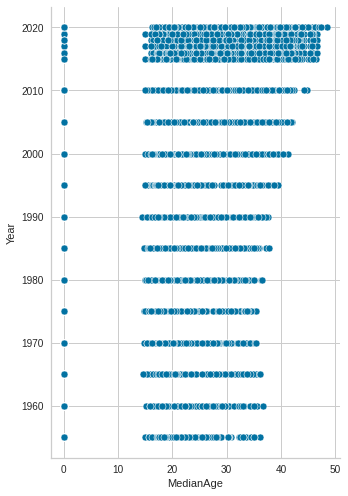

In [54]:
p = sns.pairplot(wp_df, x_vars=['MedianAge'], y_vars='Year', size=7, aspect=0.7)

MedianAge shows linearity with Year.

In [71]:

from statsmodels.formula.api import ols

#fit multiple linear regression model
model = ols('MedianAge~Year', data=wp_df).fit()

#view model summary
print(model.summary())
     

                            OLS Regression Results                            
Dep. Variable:              MedianAge   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     273.8
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           1.96e-59
Time:                        05:37:48   Log-Likelihood:                -14644.
No. Observations:                3807   AIC:                         2.929e+04
Df Residuals:                    3805   BIC:                         2.931e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -257.4965     16.881    -15.254      0.0

In [72]:

from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)

2.0204488383333796

In [73]:

from statsmodels.compat import lzip
import statsmodels.stats.api as sms

names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)
     

[('Lagrange multiplier statistic', 180.68629397345458),
 ('p-value', 3.4322273041104184e-41),
 ('f-value', 189.58959546892592),
 ('f p-value', 3.937757295179557e-42)]

Text(0.5, 1.0, 'Model1 Residuals Q-Q Plot')

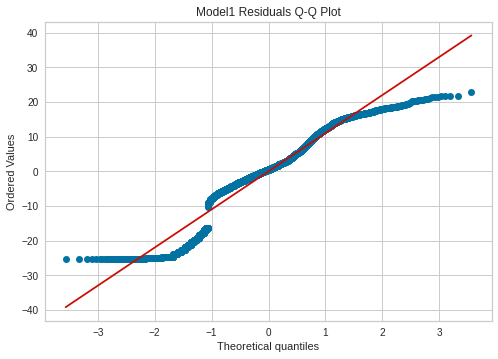

In [74]:

from scipy import stats
stats.probplot(model.resid, dist="norm", plot= plt)
plt.title("Model1 Residuals Q-Q Plot")

# **Answer the following questions**

**1.Is the relationship significant?**

**Answer.**

linear Regression-

from the heat map we can see Population, YearlyChange and UrbanPopulation contribute the most to MedianAge (target) and Fertility Rate and Yearly%Change contributing the least with values close to 0.

**2.Are any model assumptions violated?**

**Answer:**

linear Regression-

1)Linearity- MedianAge shows linear relationship with Year. hence it is not violated

2)heteroscedasticity - p value is 3.4322273041104184e-41 which is less than 0.05, we not fail to reject the null hypothesis.


Auto corellation - 2.0204488383333796 (which is with acceptable range 1.5 and 2.5)

Residual Normality - Residual are normally distributed shown by a lot in assumption section.

**3.Is there any multicollinearity in the model?**

**Answer:**

As collinearity remain common for the whole data set irrespective of the type of classification.we also observe high collinearity between features Population and Country%WorldPop.

**4.In the multivariate models are predictor variables independent of all the other predictor variables?**

**Answer.**

We also observe high collinearity between features Population and Country%WorldPop. Also there is high collinearity between Population and Yearly Change.

**5.In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

**Answer:**

Median Age

FertilityRate

GlobalRank


**Does the model make sense?**

**Answer:**

Yes. for target MedianAge we use Linear regression which helps in predicting numeric target variable MedianAge using other predictors.
It uses Light gradient Boosting machine model and Gradient Boosting Regressor model to predict the outcome.

**7.Does regularization help?**

**Answer.**

In values on "prediction on test data" section we see RMSE,MAE,MSE and R-square values only increase on application of L1 and L2. hence there is no affect of regularization.

**8.Which independent variables are significant?**

**Answer:**

Population

UrbanPopulation

Country%WorldPop


**9.Which hyperparameters are important?**

**Answer:**

2 hyperpameter were passed to all models wherein

these parameter are set to True

remove_multicollinearity = True

feature_selection= True

With their respective threshold

1)feature_selection_threshold=0.50,

2)multicollinearity_threshold = 0.8

# **References:**

1) Pycaret offcial documentation

2) Refered Towards Data Science

3) Eli5 official documentation

4) towards data science

5) youtube - stat quest

6) geeksforgeeks

7) Seaborn

8) matplotlib

9)https://www.analyticsvidhya.com/blog/2021/07/automl-using-pycaret-with-a-regression-use-case/


the official pycaret documentaion has notebooks for regression, binary and MuliClass Classification. The algorithms for imputation were directly referred from sklearn documentation and geeksforgeeks website. For understanding of concepts related to Permutation Importance, classification_report and confusion matrix multiple sources on youtube were used. For plots seaborn’s and matplotlib’s official website was used.

Copyright (c) 2022 Jeel Kanzaria

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software. THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.